# Import packages and data

In [1]:
import numpy as np
import pandas as pd
import itertools
import random
from tqdm import tqdm

### sklearn
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error

### stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

### plotting
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
file = '../data/housing-p.data.txt'
data = pd.read_csv(file,sep=' ',header=0)

# Introductory analyses

In [3]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [4]:
data.corr().to_excel("data_corr.xlsx")

In [5]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [6]:
X.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
X.CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [8]:
X.var(axis=0)

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
dtype: float64

We have a data size of 506 with 13 variables. 12 of these variables can be considered continuous. However, 'CHAS' will be considered as categorical variable. The variance of the features differ from the smallest of 0.013 to as big as 28404.759.

The 'MEDV' is the response variable while rest variables will be treated as features in our models.

## Check Assumptions

- Normality of err
- Constant variance of err
- Independence

In [9]:
X_constant = sm.add_constant(X)
est = sm.OLS(y, X_constant).fit()

/Users/jeremydai/anaconda/envs/p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**We are using all data here just to check the if the assumptions for linear regression are true in our case. The models we are actually built will not be trained on the whole dataset. This way, there will not be data leakeage.**

### Normality of err; Constant variance of err

[Text(0, 0.5, 'err'), Text(0.5, 0, 'y hat')]

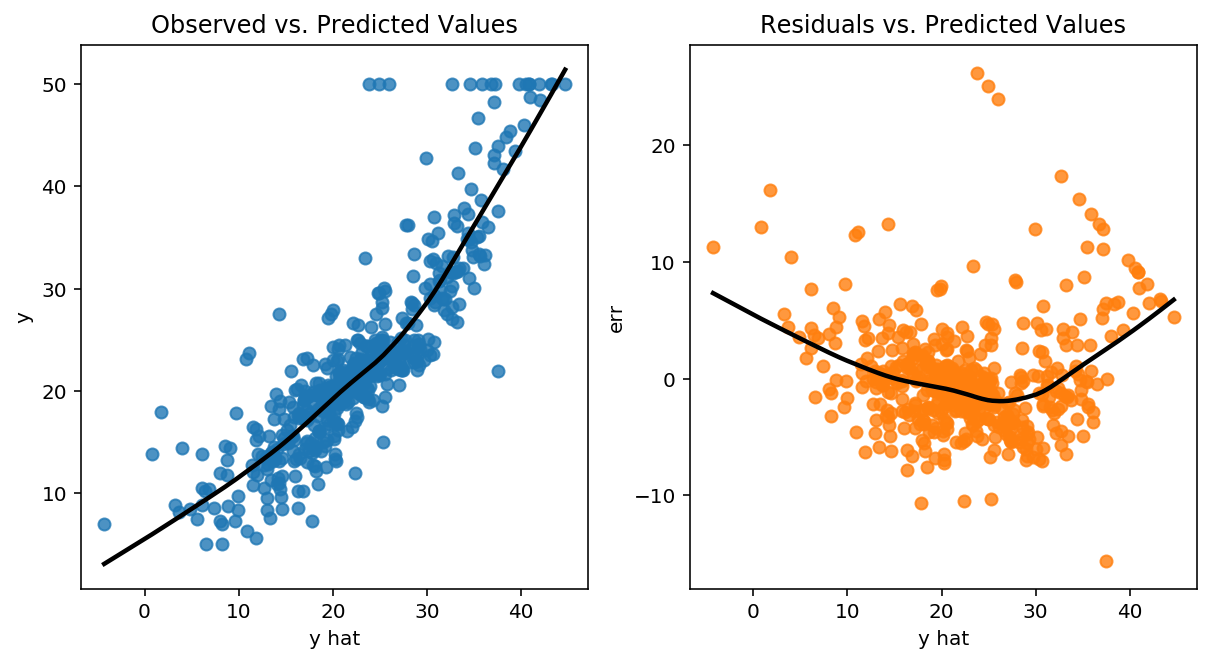

In [10]:
sns.mpl.rcParams['figure.figsize'] = (10, 5)

fig, ax = plt.subplots(1,2)
    
sns.regplot(x=est.predict(), y=y, lowess=True, ax=ax[0], line_kws={'color': 'black'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=12)
ax[0].set(xlabel='y hat', ylabel='y')

sns.regplot(x=est.predict(), y=est.resid, lowess=True, ax=ax[1], line_kws={'color': 'black'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=12)
ax[1].set(xlabel='y hat', ylabel='err')

We can see that the errors do not have equal variance. Also we found the data might be manually cut, with the upper bound on possible values of variable of interest equal to 50.

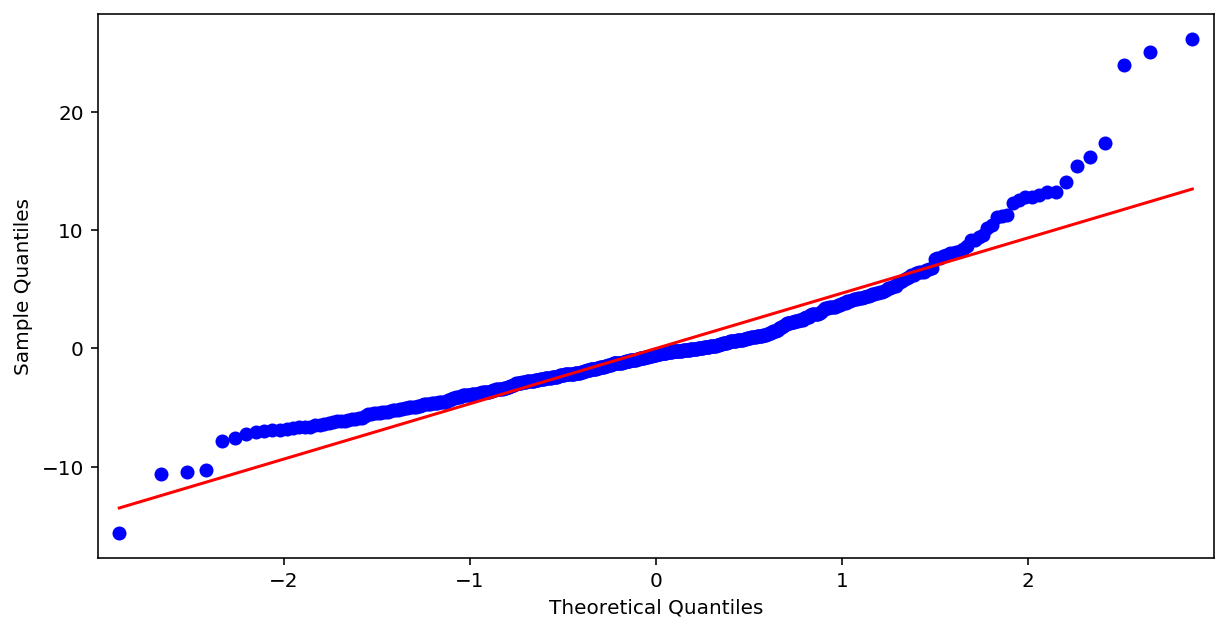

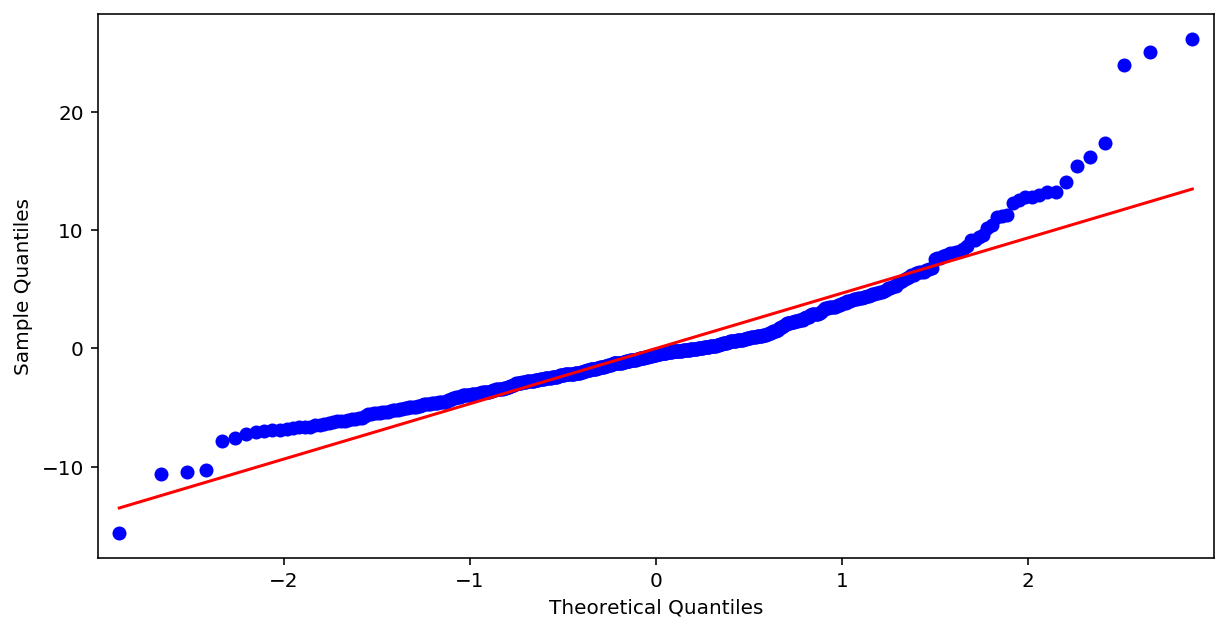

In [11]:
sm.ProbPlot(est.resid).qqplot(line='s')

We can see that the residual err is not normally distributed with many outliers to the right. It is consistent with the previous observation that the data might be manually cut.

### multicollinearity

In [12]:
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
vif,1.792192,2.298758,3.991596,1.073995,4.39372,1.933744,3.100826,3.955945,7.484496,9.008554,1.799084,1.348521,2.941491


If there was no multicollinearity between variables, the VIF would be 1 for all the variables.

In our case, the VIFs for 'TAX' and 'RAD' are 9.01 and 7.48 respectively, indicating they are correlated to other features.

Based on above discussion, the assumptions of linear regression are not met for our dataset.We cannot perform linear analysis on our fitted linear model. That means the p-values from the t-test, F-test are not valid. We will not rely on those for choosing parameters.

# Cross Validation

We only have 506 data points. With limited data, we will apply cross validation to Optimize the parameters. The dataset will be divided into two parts:
- Test set: 156 data points
- Training set: the first 350 data points

We keep around 30% of our dataset to give a high confidence in the overall performance of our models.

The training dataset is furhter divided into 5 folds. During each round, the training dataset will be futther broke downinto the two sets:
- Cross validation - Training set: 80% of 350 data points
- Cross validation - Development set: 20% of 350 data points

We will optimize the hyper parameters, like number of features to use in the linear model, lamda, for our models using Cross validation - Training set. We will select the model with the least error using Cross validation - Development set.

To compare different models, we will estimate their generalization error using test data.

## Evaluation Metrics
We will use MSE to mesure how well our models fit the data

## Data Split

In [13]:
X_train_constant, X_test_constant, y_train, y_test = model_selection.train_test_split(X_constant,y,test_size=156,shuffle=False)

In [14]:
### shuffling the data
random.seed(2019)
shuffled_index = np.arange(len(y_train))
random.shuffle(shuffled_index)
X_train_constant = X_train_constant.iloc[shuffled_index,]
y_train = y_train[shuffled_index]

In [15]:
### without the constant
X_train =X_train_constant.drop('const',axis=1)
X_test = X_test_constant.drop('const',axis=1)

In [16]:
### check
print(X_train_constant.columns,'\n',X_train.columns)

Index(['const', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object') 
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


## Fit linear model using least square method

In [17]:
est = sm.OLS(y_train, X_train_constant).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     75.43
Date:                Sat, 23 Nov 2019   Prob (F-statistic):           3.03e-91
Time:                        20:20:10   Log-Likelihood:                -1029.2
No. Observations:                 350   AIC:                             2086.
Df Residuals:                     336   BIC:                             2140.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.4003      6.174      6.381      0.0

The estimated coefficients, their standard errors, and statistical significance (P>|t|) are shown in the above table. As illustrated in the EDA part, we will not interpret statistical significance because the t-test is not valid when the assumptions for linear regression is not met.

In [20]:
print('Train:',mean_squared_error(y_train,est.predict(X_train_constant)))
print('Test:',mean_squared_error(y_test,est.predict(X_test_constant)))

Train: 20.977044848427465
Test: 25.15030481710233


In [130]:
RSS_full = mean_squared_error(y_train,est.predict(X_train_constant)) * len(y_train)
print('RSS: {:.2f}'.format(RSS_full))

RSS: 7341.97


## 1. least squares model

In [21]:
size = len(y_train)/5

In [23]:
MSE_ls = []
for i in range(5):
    test_index = np.arange(i*size,(i+1)*size)
    train_index = [x for x in np.arange(0,350) if x not in test_index]
    x_tr = X_train.iloc[train_index]
    x_te = X_train.iloc[test_index]
    y_tr = y_train.iloc[train_index]
    y_te = y_train.iloc[test_index]
    model_ls = LinearRegression()
    model_ls.fit(x_tr, y_tr)
    MSE_ls.append(mean_squared_error(y_te,model_ls.predict(x_te)))

In [29]:
df_ls = pd.Series(MSE_ls) 

In [128]:
### Store in DataFrame
print('Sum of RSS: {:.2f}'.format(np.sum(df_ls*size)))

Sum of RSS: 8612.92


In [34]:
model_ls = LinearRegression()
model_ls.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 2. Full subset search

In [35]:
def fit_linear_reg(X,y):
    mse_list = [],
    for i in range(5):
        test_index = np.arange(i*size,(i+1)*size)
        train_index = [x for x in np.arange(0,350) if x not in test_index]
        x_tr = X.iloc[train_index]
        x_te = X.iloc[test_index]
        y_tr = y.iloc[train_index]
        y_te = y.iloc[test_index]
        model = LinearRegression()
        model.fit(x_tr, y_tr)
        mse_list.append(mean_squared_error(y_te,model.predict(x_te)))
    return np.mean(mse_list)

In [36]:
### Initialization variables
K = len(X_train.columns)
MSE_list, feature_list = [],[]
numb_features = []

In [37]:
### Looping over k = 1 to K features in X_train
for k in tqdm(range(K)):
    #Looping over all possible combinations: from 13 choose k
    for combo in itertools.combinations(X_train.columns,k+1):
        tmp_result = fit_linear_reg(X_train[list(combo)],y_train) 
        MSE_list.append(tmp_result)                 
        feature_list.append(combo)
        numb_features.append(len(combo))   

100%|██████████| 13/13 [04:14<00:00, 19.55s/it]


In [38]:
### Store in DataFrame
df_sub = pd.DataFrame({'numb_features': numb_features,'MSE': MSE_list,'features':feature_list})
#df.groupby('numb_features').apply(len)

In [39]:
df_sub_best_all = df_sub[df_sub['MSE'] == df_sub.groupby('numb_features')['MSE'].transform(min)]
df_sub_best_all

,numb_features,MSE,features
12,1,36.439037,"(LSTAT,)"
69,2,30.718628,"(RM, LSTAT)"
340,3,27.568736,"(RM, PTRATIO, LSTAT)"
1045,4,26.911865,"(RM, DIS, PTRATIO, LSTAT)"
2276,5,26.054151,"(NOX, RM, DIS, PTRATIO, LSTAT)"
3530,6,25.395660,"(ZN, NOX, RM, DIS, PTRATIO, LSTAT)"
5426,7,25.047405,"(ZN, NOX, RM, DIS, PTRATIO, B, LSTAT)"
6261,8,24.808111,"(CRIM, ZN, RM, DIS, RAD, TAX, PTRATIO, LSTAT)"
7408,9,24.431164,"(CRIM, ZN, NOX, RM, DIS, RAD, TAX, PTRATIO, LS..."
7975,10,24.278727,"(CRIM, ZN, NOX, RM, DIS, RAD, TAX, PTRATIO, B,..."


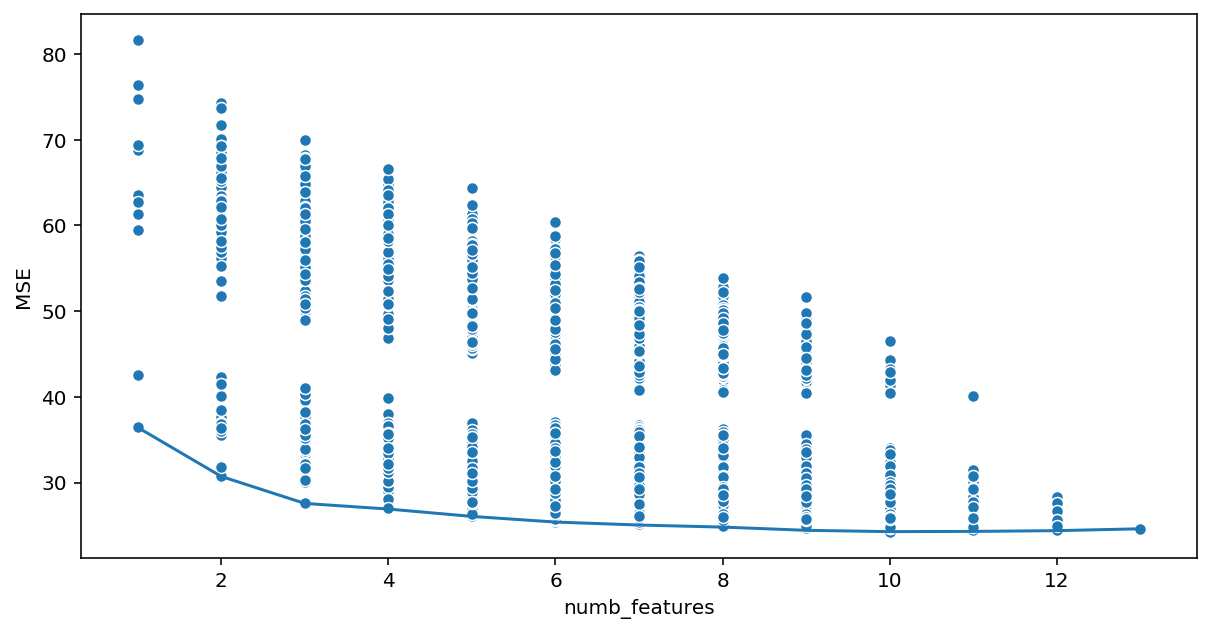

In [159]:
sns.mpl.rcParams['figure.figsize'] = (10, 5)
sns.lineplot(df_sub_best_all.numb_features, df_sub_best_all.MSE)
sns.scatterplot(df_sub.numb_features, df_sub.MSE)

In [137]:
df_features = pd.DataFrame(index=df_sub_best_all.numb_features, columns=X_train.columns)
df_features = df_features.fillna(0) 
n_features = 1
for i in df_sub_best_all['features'].tolist():
    for j in i:
        df_features.loc[n_features,j] = 1
    n_features += 1

In [138]:
df_features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
numb_features,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,1,0,0,1,0,1
5,0,0,0,0,1,1,0,1,0,0,1,0,1
6,0,1,0,0,1,1,0,1,0,0,1,0,1
7,0,1,0,0,1,1,0,1,0,0,1,1,1
8,1,1,0,0,0,1,0,1,1,1,1,0,1
9,1,1,0,0,1,1,0,1,1,1,1,0,1


In [40]:
df_sub_best = df_sub[df_sub['MSE'] == min(df_sub.MSE)]

In [139]:
df_sub_best

,numb_features,MSE,features
7975,10,24.278727,"(CRIM, ZN, NOX, RM, DIS, RAD, TAX, PTRATIO, B,..."


In [41]:
feat = df_sub_best.features.to_list()
feat = [i for i in feat[0]]
feat 

['CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

Based on the cross validation, The features'CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B' and 'LSTAT' will included in the best-subset model

In [42]:
X_bestsub = X_train[feat]

In [43]:
model_bestsub = LinearRegression()
model_bestsub.fit(X_bestsub,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Apply ridge regression

In [243]:
def fit_ridge_reg(X,y,a,normal):
    mse_list = []
    for i in range(5):
        test_index = np.arange(i*size,(i+1)*size)
        train_index = [x for x in np.arange(0,350) if x not in test_index]
        x_tr = X.iloc[train_index]
        x_te = X.iloc[test_index]
        y_tr = y.iloc[train_index]
        y_te = y.iloc[test_index]
        model = Ridge(alpha=a,fit_intercept=True, normalize=normal)
        model.fit(x_tr, y_tr)
        mse_list.append(mean_squared_error(y_te,model.predict(x_te)))
    return np.mean(mse_list)

In [244]:
### Normalize
MSE_list, a_list = [],[]
#Looping over alphas=[1e-3, 1e-2, 1e-1, 1]
alphas=[1e-3, 0.01, 0.015, 0.02, 0.1, 1]
for i in tqdm(range(len(alphas))):
    a = alphas[i]
    tmp_result = fit_ridge_reg(X_train,y_train,a, True)   
    MSE_list.append(tmp_result)
    a_list.append(a) 

df_ridge = pd.DataFrame({'lmda': a_list,'MSE': MSE_list})

### Not Normalize
MSE_list, a_list = [],[]
for i in tqdm(range(len(alphas))):
    a = alphas[i]
    tmp_result = fit_ridge_reg(X_train,y_train,a, False)   
    MSE_list.append(tmp_result)
    a_list.append(a) 

df2 = pd.DataFrame({'lmda': a_list,'MSE': MSE_list})

100%|██████████| 6/6 [00:00<00:00, 32.85it/s]


In [245]:
df_ridge # Normalize

,lmda,MSE
0,0.001,24.591224
1,0.010,24.473553
2,0.015,24.429823
3,0.020,24.397296
4,0.100,24.497687
5,1.000,31.014616


In [246]:
df2 # Not Normalize

,lmda,MSE
0,0.001,24.606690
1,0.010,24.592205
2,0.015,24.584459
3,0.020,24.576920
4,0.100,24.479988
5,1.000,24.303585


We can see that ridge regression works better after feature normalization when the regularization term (C) is smaller than 1. This is due to the huge difference in feature variances as mentioned in EDA part.


Also, when the features are normalized, MSE varies from 23.721 to 31.193. When the features are not normalized, MSE only varies from 23.749 to 23.943. It shows the ridge regression does not adjust our model effectively to actually influence the evaluation metric.

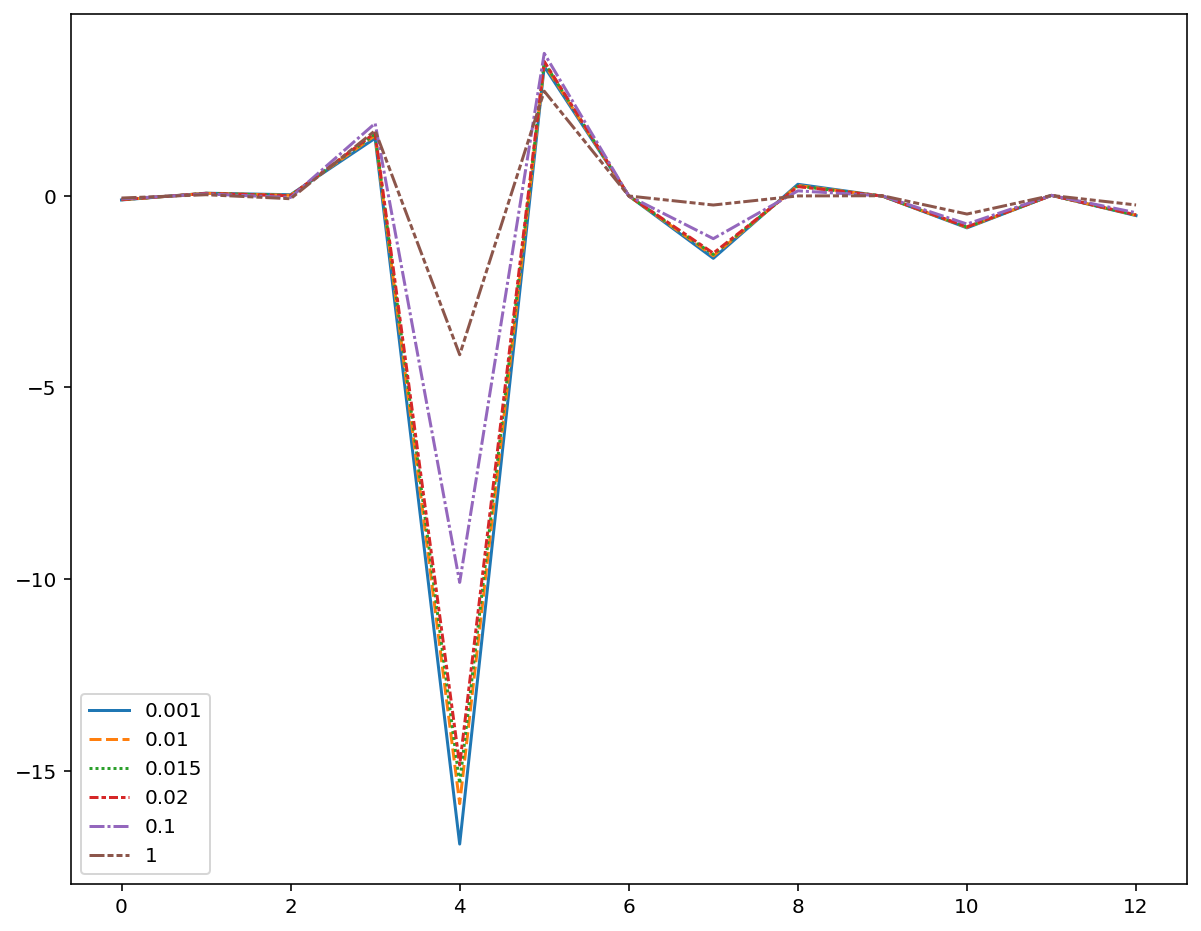

In [247]:
coef_list = []
for a in alphas:
    model = Ridge(alpha=a,fit_intercept=True, normalize=True)
    model.fit(X_train, y_train)
    coef_list.append(model.coef_)
df_coef_ridge = pd.DataFrame({'coef': coef_list}, index = a_list)

sns.mpl.rcParams['figure.figsize'] = (10, 8)
g = sns.lineplot(data = coef_list,legend=False)
plt.legend(a_list)

In [52]:
df_ridge_best = df_ridge[df_ridge.MSE == min(df_ridge.MSE)]
df_ridge_best

,C,MSE
2,0.02,24.397296


In [53]:
model_ridge = Ridge(alpha=df_ridge_best.iloc[0,0],fit_intercept=True, normalize=True)
model_ridge.fit(X_train, y_train)

Ridge(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

## Apply lasso regression

In [248]:
def fit_lasso_reg(X,y,a,normal):
    #Fit ridge regression model and return RSS and R squared values
    mse_list = []
    for i in range(5):
        test_index = np.arange(i*size,(i+1)*size)
        train_index = [x for x in np.arange(0,350) if x not in test_index]
        x_tr = X.iloc[train_index]
        x_te = X.iloc[test_index]
        y_tr = y.iloc[train_index]
        y_te = y.iloc[test_index]
        model = Lasso(alpha=a,fit_intercept=True, normalize=normal)
        model.fit(x_tr, y_tr)
        mse_list.append(mean_squared_error(y_te,model.predict(x_te))) 
    return np.mean(mse_list)

In [249]:
### normalize
MSE_list, a_list = [],[]
#Looping over alphas=[1e-3, 1e-2, 1e-1, 1]
alphas=[5e-4, 1e-3, 5e-3, 1e-2, 1]
for i in tqdm(range(len(alphas))):
    a = alphas[i]
    tmp_result = fit_lasso_reg(X_train,y_train,a, True)  
    MSE_list.append(tmp_result)
    a_list.append(a) 

df_lasso = pd.DataFrame({'lmda': a_list,'MSE': MSE_list})

### not normalize
MSE_list, a_list = [],[]
for i in tqdm(range(len(alphas))):
    a = alphas[i]
    tmp_result = fit_lasso_reg(X_train,y_train,a, False) 
    MSE_list.append(tmp_result)
    a_list.append(a) 

df2 = pd.DataFrame({'lmda': a_list,'MSE': MSE_list})

100%|██████████| 5/5 [00:00<00:00, 32.91it/s]


In [250]:
df_lasso #normalize

,lmda,MSE
0,0.0005,24.576676
1,0.0010,24.552342
2,0.0050,24.725016
3,0.0100,25.557065
4,1.0000,83.010051


In [251]:
df2 # not normalize

,lmda,MSE
0,0.0005,24.603797
1,0.0010,24.599479
2,0.0050,24.573358
3,0.0100,24.561988
4,1.0000,28.026114


In [252]:
df_lasso_best = df_lasso[df_lasso.MSE == min(df_lasso.MSE)]
df_lasso_best

,lmda,MSE
1,0.001,24.552342


In [253]:
model_lasso = Lasso(alpha=df_lasso_best.iloc[0,0],fit_intercept=True, normalize=True)
model_lasso.fit(X_train, y_train)
#model_lasso.score(X_test,y_test)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

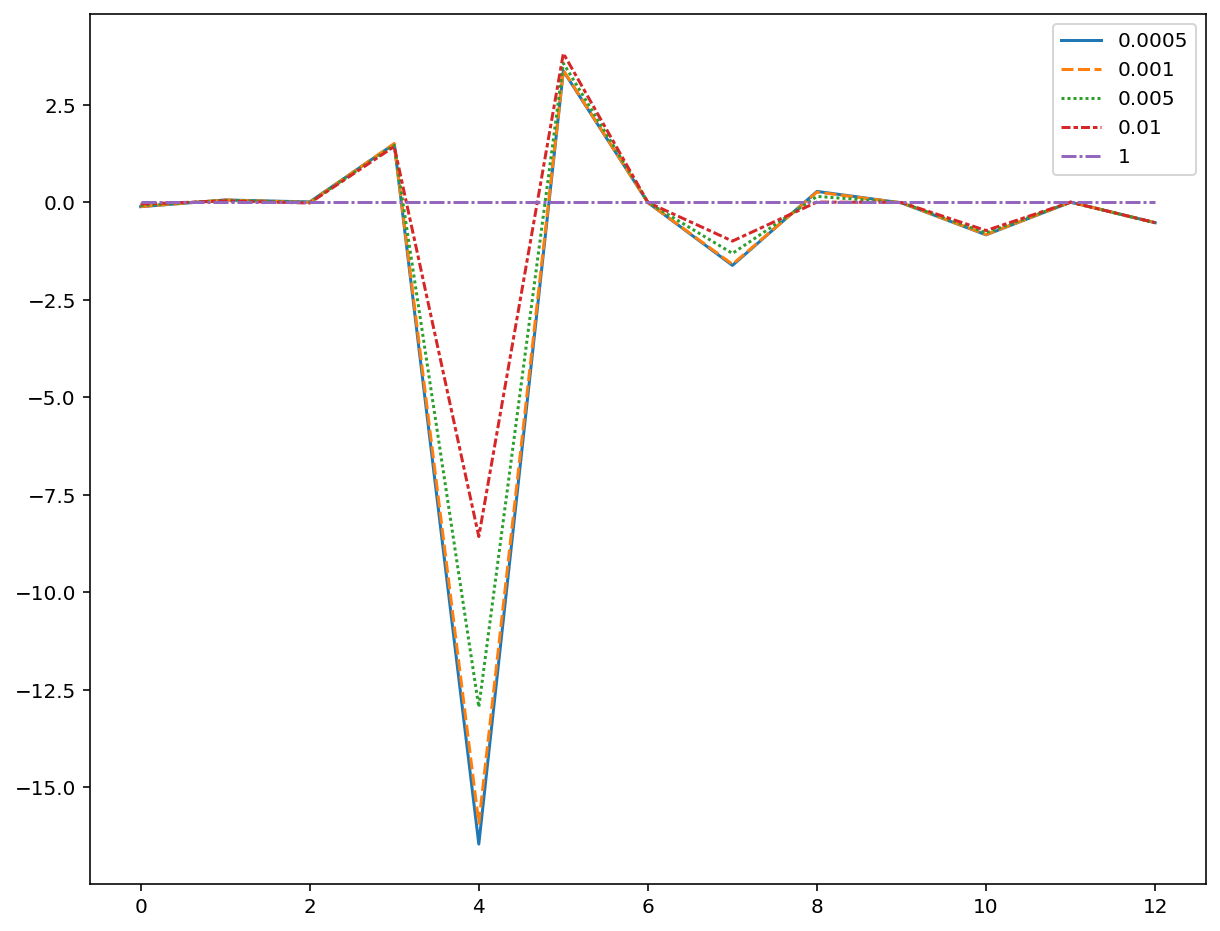

In [254]:
coef_list = []
for a in alphas:
    model = Lasso(alpha=a,fit_intercept=True, normalize=True)
    model.fit(X_train, y_train)
    coef_list.append(model.coef_)
df_coef_ridge = pd.DataFrame({'coef': coef_list}, index = a_list)

sns.mpl.rcParams['figure.figsize'] = (10, 8)
g = sns.lineplot(data = coef_list,legend=False)
plt.legend(a_list)

/Users/jeremydai/anaconda/envs/p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/Users/jeremydai/anaconda/envs/p36/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


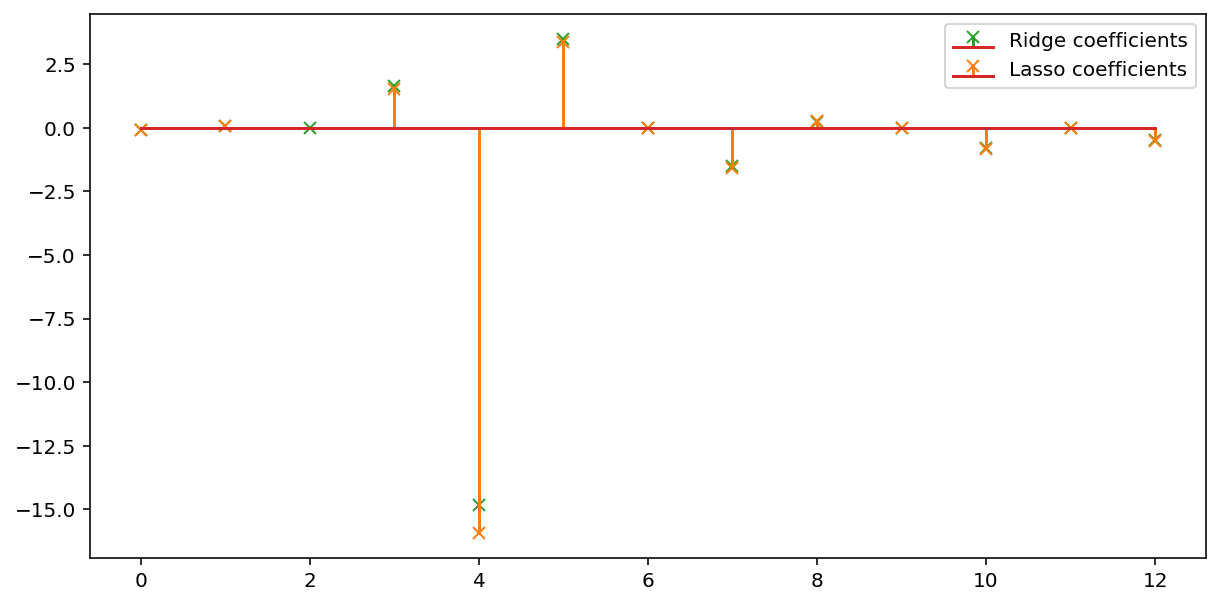

In [160]:
m, s, _ = plt.stem(np.where(model_ridge.coef_)[0], model_ridge.coef_[model_ridge.coef_ != 0], 
                   markerfmt='x', label='Ridge coefficients')
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(np.where(model_lasso.coef_)[0], model_lasso.coef_[model_lasso.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients')
plt.setp([m, s], color='#ff7f0e')
#plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients',markerfmt='bx')

plt.legend(loc='best')
plt.show()

Similar to ridge regression, lasso regression works better after feature normalization when the regularization term (C) is smaller than 0.005. 

In our study, on the cross validation data sets, MSE for ridge regression varies from 23.748 to 82.346 when the features are normalized. However, When the features are not normalized, MSE only varies from 23.757 to 27.958. With regularization not too big(<0.005 in our case), Lasso regression does not adjust our model effectively to actually influence the evaluation metric.

# Model comparison

## Accuracy

In [236]:
model = ['least squares regression', 'best-subset', 'ridge', 'lasso']
MSE_train = []
MSE_test = []
R2_square = []

MSE_train.append(mean_squared_error(y_train,model_ls.predict(X_train))) # least square
MSE_train.append(mean_squared_error(y_train,model_bestsub.predict(X_train[feat]))) # bestsub
MSE_train.append(mean_squared_error(y_train,model_ridge.predict(X_train))) # Ridge
MSE_train.append(mean_squared_error(y_train,model_lasso.predict(X_train))) # lasso

MSE_test.append(mean_squared_error(y_test,model_ls.predict(X_test))) # least square
MSE_test.append(mean_squared_error(y_test,model_bestsub.predict(X_test[feat]))) # bestsub
MSE_test.append(mean_squared_error(y_test,model_ridge.predict(X_test))) # Ridge
MSE_test.append(mean_squared_error(y_test,model_lasso.predict(X_test))) # lasso

R2_square.append(model_ls.score(X_test,y_test)) # least square
R2_square.append(model_bestsub.score(X_test[feat],y_test)) # bestsub
R2_square.append(model_ridge.score(X_test,y_test)) # Ridge
R2_square.append(model_lasso.score(X_test,y_test)) # lasso

#Store in DataFrame
df_test = pd.DataFrame({'model': model,'MSE (Train)': MSE_train, 'MSE (Test)': MSE_test,'R2 (Test)': R2_square})

In [237]:
df_test

,model,MSE (Train),MSE (Test),R2 (Test)
0,least squares regression,20.977045,25.150305,0.718537
1,best-subset,21.137787,26.001906,0.709007
2,ridge,21.058909,25.138492,0.718670
3,lasso,20.999343,25.158244,0.718449


In [238]:
# the magnitude of the differences
diff_test = df_test.iloc[1:4, 1:3] - df_test.iloc[0, 1:3]
diff_test.index = [i+' compared to LS' for i in model[1:]]
diff_test

,MSE (Train),MSE (Test)
best-subset compared to LS,0.160743,0.851602
ridge compared to LS,0.081864,-0.011813
lasso compared to LS,0.022298,0.007939


Based on the above table, only the ridge model performs better than least squares regression.

In [239]:
# test-set error against the CV-error
df_ls_best = pd.DataFrame([[df_ls.mean()]], columns =  ['MSE'])

list_cv = [df_ls_best,
           df_sub_best[['MSE']],
           df_ridge_best[['MSE']],
           df_lasso_best[['MSE']]]
df_cv = pd.concat(list_cv, axis=0)
df_cv.index = model

df_cv

,MSE
least squares regression,24.608344
best-subset,24.278727
ridge,24.397296
lasso,24.552342


In [114]:
# the magnitude of the differences
diff_cv=df_cv.iloc[1:4, ] - df_cv.iloc[0, ]
diff_cv.index = [i+' compared to LS' for i in model[1:]]
diff_cv

,MSE
best-subset compared to LS,-0.329617
ridge compared to LS,-0.211048
lasso compared to LS,-0.056002


## compare coeffiency

In [65]:
s1 = pd.Series(model_ls.coef_,index=X_train.columns)
s2 = pd.Series(model_bestsub.coef_,index=feat)
s3 = pd.Series(model_ridge.coef_,index=X_train.columns)
s4 = pd.Series(model_lasso.coef_,index=X_train.columns)

In [66]:
df_coef = pd.concat([s1, s2, s3, s4], axis=1,sort=False)
df_coef.columns = model
df_coef.fillna(0, inplace= True)

In [67]:
df_coef.round(4)

,least squares regression,best-subset,ridge,lasso
CRIM,-0.1135,-0.1182,-0.1034,-0.1069
ZN,0.0637,0.0645,0.0570,0.0605
INDUS,0.0248,0.0000,-0.0048,0.0000
CHAS,1.4861,0.0000,1.6363,1.5089
NOX,-17.0320,-16.6651,-14.8435,-15.9263
RM,3.3580,3.3305,3.4987,3.3864
AGE,-0.0054,0.0000,-0.0062,-0.0041
DIS,-1.6425,-1.6609,-1.5009,-1.5882
RAD,0.2993,0.3038,0.2348,0.2639
TAX,-0.0138,-0.0138,-0.0107,-0.0120


In [68]:
var = X_test.var(axis=0)

In [69]:
## times standard deviation
coef = df_coef.multiply(var**0.5, axis=0)
coef.round(4)

,least squares regression,best-subset,ridge,lasso
CRIM,-1.0306,-1.0731,-0.9384,-0.9701
ZN,1.4846,1.5037,1.3279,1.4101
INDUS,0.1658,0.0000,-0.0320,0.0000
CHAS,0.3652,0.0000,0.4021,0.3708
NOX,-2.0183,-1.9748,-1.7590,-1.8873
RM,2.3828,2.3632,2.4826,2.4029
AGE,-0.1523,0.0000,-0.1759,-0.1149
DIS,-3.5185,-3.5580,-3.2151,-3.4022
RAD,2.5750,2.6137,2.0202,2.2704
TAX,-2.3010,-2.3051,-1.7894,-2.0074


bestsub gets rid of those colse to 0

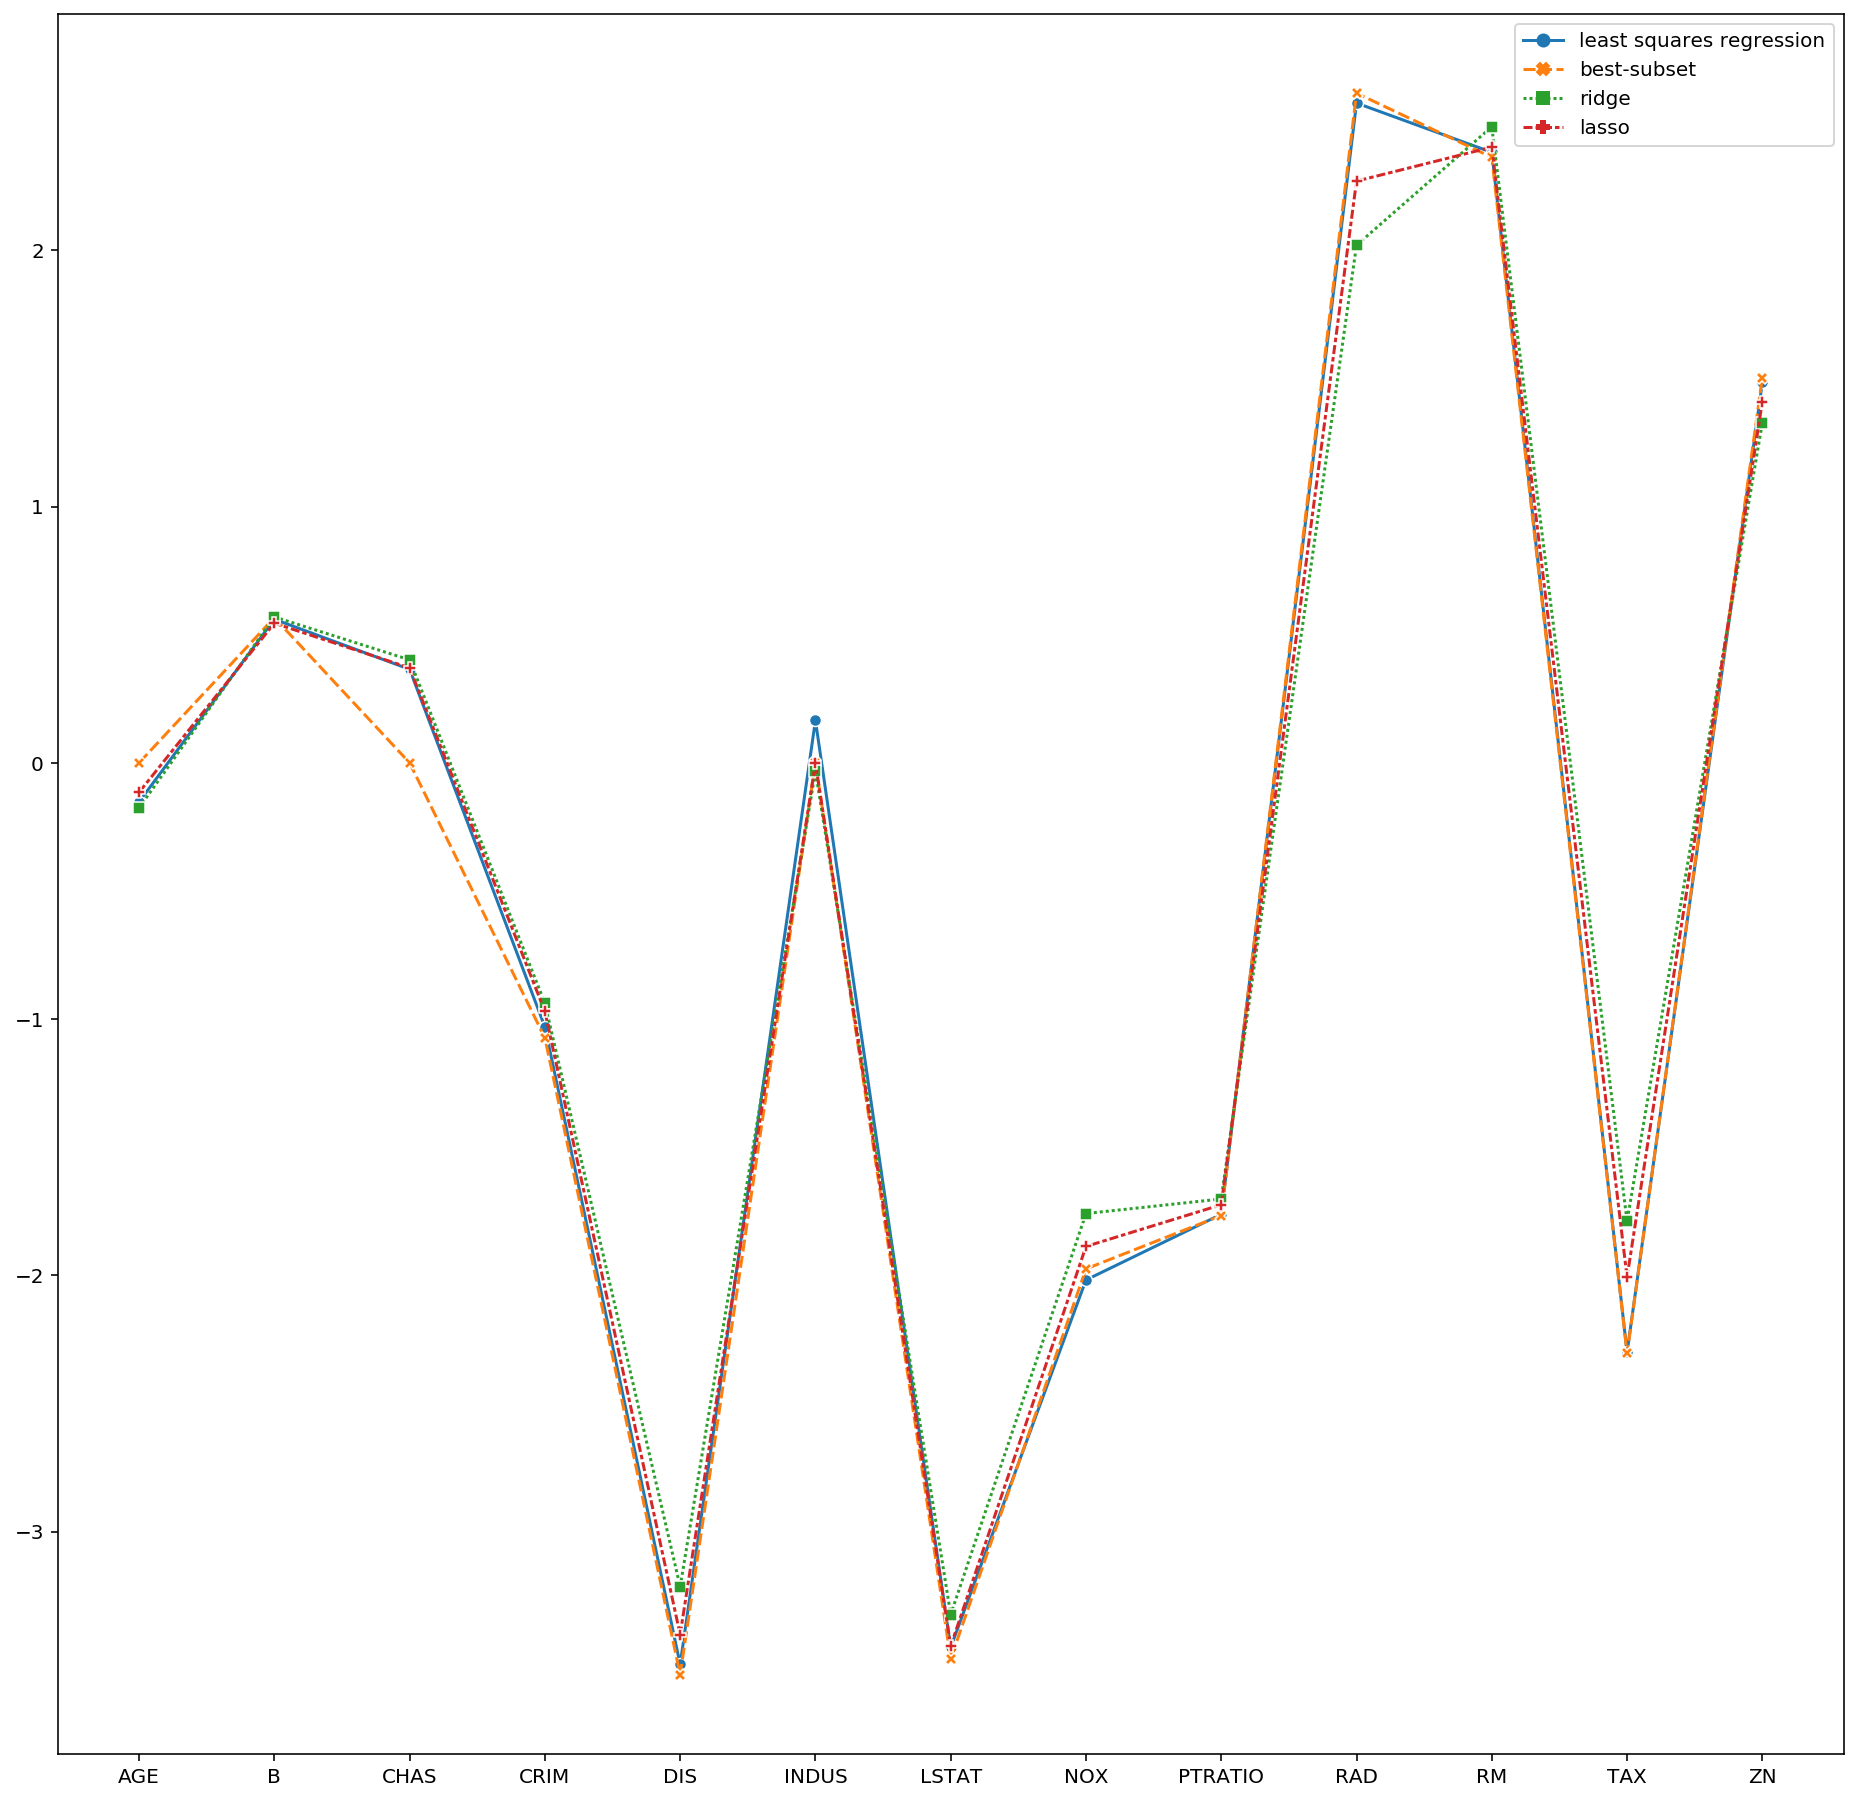

In [70]:
sns.mpl.rcParams['figure.figsize'] = (16, 16)
ax = sns.lineplot(data=coef,markers=True)

why it's better?
RAD - TAX : high corr->improved

In [261]:
sum(y_train == 50)/len(y_train)

0.02857142857142857

In [260]:
sum(y_test == 50)/len(y_test)

0.038461538461538464

Ref:
1. [full subset-search](https://xavierbourretsicotte.github.io/subset_selection.html)
2. [Check assumptions](https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0)
